# DataCamp : pandas Foundations

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/ind_pop_data.csv')
df.head()

,CountryName,CountryCode,Year,TotalPop,UrbanPopRatio
0,Afghanistan,AFG,1960,8990000.0,8.22
1,Afghanistan,AFG,1961,9160000.0,8.51
2,Afghanistan,AFG,1962,9340000.0,8.81
3,Afghanistan,AFG,1963,9530000.0,9.11
4,Afghanistan,AFG,1964,9730000.0,9.43


In [4]:
df.values

array([['Afghanistan', 'AFG', 1960, 8990000.0, 8.22],
       ['Afghanistan', 'AFG', 1961, 9160000.0, 8.51],
       ['Afghanistan', 'AFG', 1962, 9340000.0, 8.81],
       ..., 
       ['Zimbabwe', 'ZWE', 2013, 14900000.0, 32.7],
       ['Zimbabwe', 'ZWE', 2014, 15200000.0, 32.5],
       ['Zimbabwe', 'ZWE', 2015, 15600000.0, 32.4]], dtype=object)

In [5]:
df.index

RangeIndex(start=0, stop=14612, step=1)

------
### create dataframe from dictionary

In [6]:
#1. by zip lists

In [7]:
list_keys = ['country', 'population']
list_values = [['targaryen', 'stark'], [579, 973]]

In [8]:
zipped = list(zip(list_keys,list_values))
data = dict(zipped)
df_zip = pd.DataFrame(data)
df_zip

,country,population
0,targaryen,579
1,stark,973


In [9]:
df_zip.columns = ['kingdom', 'army'];   # change column labels
df_zip

,kingdom,army
0,targaryen,579
1,stark,973


In [10]:
# 2. by broadcasting

In [11]:
data = {'kingdom':list_values[0], 'babies':list_values[1]}
df_dict = pd.DataFrame(data)
df_dict

,babies,kingdom
0,579,targaryen
1,973,stark


------------------
## Importing & Exporting

#### 데이터가 깔끔하지 않은 파일에서 데이터 가져오기

In [12]:
# df1 = pd.read_csv(file_messy, header=0, names=new_col_names)
# df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

#### 데이터 저장하기

In [13]:
# df2.to_csv(file_clean, index=False)              # Save the DataFrame to a CSV file without the index
# df2.to_excel('file_clean.xlsx', index=False)   # Save the DataFrame to an excel file without the index

---------------
## Ploting with pandas

In [14]:
df_pop = pd.read_csv('data/ind_pop_data.csv')
df_pop.head()

,CountryName,CountryCode,Year,TotalPop,UrbanPopRatio
0,Afghanistan,AFG,1960,8990000.0,8.22
1,Afghanistan,AFG,1961,9160000.0,8.51
2,Afghanistan,AFG,1962,9340000.0,8.81
3,Afghanistan,AFG,1963,9530000.0,9.11
4,Afghanistan,AFG,1964,9730000.0,9.43


In [15]:
# example 1

In [16]:
df_c = df_pop[df_pop['CountryCode'] == 'CEB'].loc[:,['TotalPop','UrbanPopRatio']]
df_c.TotalPop = df_c.TotalPop / 1000000
df_c.head()

,TotalPop,UrbanPopRatio
2240,91.4,44.5
2241,92.2,45.2
2242,93.0,45.9
2243,93.8,46.5
2244,94.7,47.2


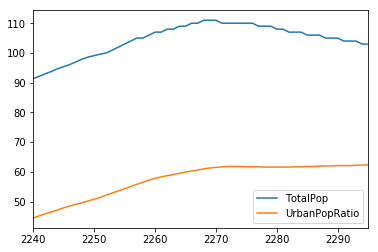

In [17]:
df_c.plot()

In [18]:
# example 2

In [19]:
df_k = df_pop[df_pop['CountryCode'] == 'KOR'].loc[:,['Year','TotalPop','UrbanPopRatio']]
df_k.TotalPop = df_k.TotalPop / 1000000
df_k.head()

,Year,TotalPop,UrbanPopRatio
6884,1960,25.0,27.7
6885,1961,25.8,28.5
6886,1962,26.5,29.5
6887,1963,27.3,30.4
6888,1964,28.0,31.4


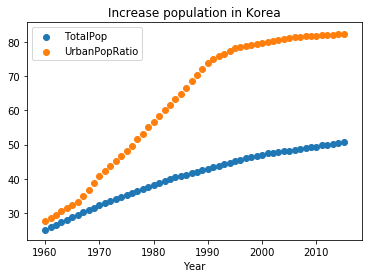

In [20]:
plt.scatter(df_k['Year'], df_k['TotalPop'])
plt.scatter(df_k['Year'], df_k['UrbanPopRatio'])
plt.legend()
plt.title('Increase population in Korea')
plt.xlabel('Year')

In [21]:
# example 3

In [22]:
year_s = pd.Series(list(df_k['Year']))
kor_s = pd.Series(list(df_k['UrbanPopRatio']))
ceb_s = pd.Series(list(df_c['UrbanPopRatio']))

df_new = pd.DataFrame()
df_new['Year'] = year_s
df_new['KOR'] = kor_s
df_new['CEB'] = ceb_s

df_new.head()

,Year,KOR,CEB
0,1960,27.7,44.5
1,1961,28.5,45.2
2,1962,29.5,45.9
3,1963,30.4,46.5
4,1964,31.4,47.2


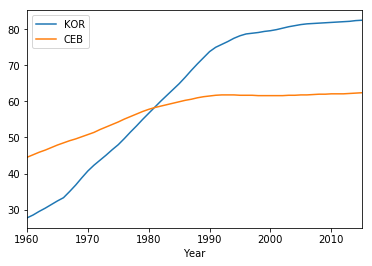

In [23]:
df_new.plot(x='Year', y=['KOR','CEB'])

### boxplot

In [25]:
kor_s = pd.Series(list(df_k['TotalPop']))
ceb_s = pd.Series(list(df_c['TotalPop']))

df_new = pd.DataFrame()
df_new['KOR'] = kor_s
df_new['CEB'] = ceb_s

df_new.head()

,KOR,CEB
0,25.0,91.4
1,25.8,92.2
2,26.5,93.0
3,27.3,93.8
4,28.0,94.7


KOR       Axes(0.125,0.125;0.352273x0.755)
CEB    Axes(0.547727,0.125;0.352273x0.755)
dtype: object

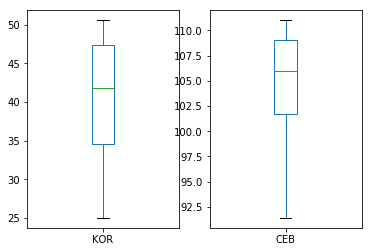

In [26]:
cols = ['KOR', 'CEB']
df_new[cols].plot(kind='box', subplots=True)   # Generate the box plots

### histogram

* histogram, scatter plot  -- [pandas04.ipynb](https://github.com/woosa7/Python_DataAnalysis/blob/master/pandas/pandas04.ipynb) 참조

In [27]:
df = pd.read_csv('data/worldreport.csv', index_col=0)
df.head()

,gdp_cap,life_exp,popul
0,974.58,43.82,31.88
1,5937.02,76.42,3.60
2,6223.36,72.30,33.33
3,4797.23,42.73,12.42
4,12779.37,75.31,40.30


In [28]:
df.describe()

,gdp_cap,life_exp,popul
count,142.000000,142.000000,142.000000
mean,11680.066831,67.002908,44.016514
std,12859.936734,12.073475,147.621369
min,277.550000,39.610000,0.190000
25%,1624.837500,57.152500,4.505000
50%,6124.365000,71.934000,10.515000
75%,18008.830000,76.411000,31.202500
max,49357.190000,82.600000,1318.680000


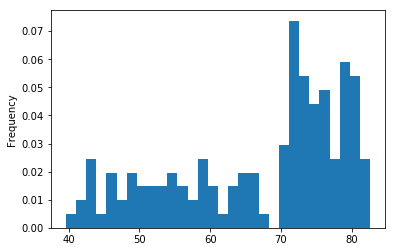

In [29]:
df['life_exp'].plot(kind='hist', normed=True, bins=30)

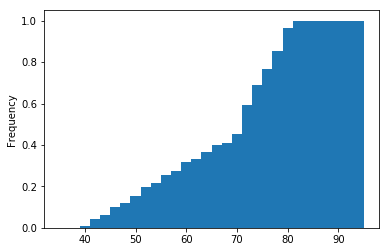

In [30]:
# 누적 히스토그램
df['life_exp'].plot(kind='hist', normed=True, cumulative=True, bins=30, range=(35,95))

### boxplot

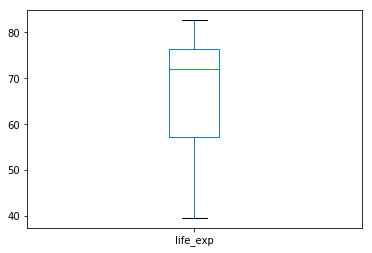

In [31]:
df['life_exp'].plot(kind='box')

In [32]:
# subplot 분리

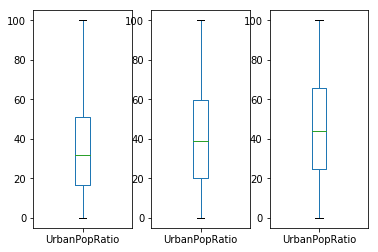

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3)
df_pop.loc[df_pop['Year'] == 1960].plot(ax=axes[0], y='UrbanPopRatio', kind='box')
df_pop.loc[df_pop['Year'] == 1970].plot(ax=axes[1], y='UrbanPopRatio', kind='box')
df_pop.loc[df_pop['Year'] == 1980].plot(ax=axes[2], y='UrbanPopRatio', kind='box')